In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from tqdm import tqdm

from torch.nn import Embedding, LSTM
from torch.nn.utils.rnn import pack_padded_sequence

# Device configuration
cuda = False
if torch.cuda.is_available():
    cuda = True

print(cuda)
torch.set_printoptions(threshold=1000)


True


The code here is to evaluate classifier models using two different methods. Fisrt the classifier that was trained on the real data is tested tested on the Synthetic data and the other is the classifier that was trained on the synthetic data is tested on the real data.

In [2]:
#load fake data
df_benign_fake = pd.read_csv("../checkpoints/URL_LSTM/11-29-2021/Benign/Benign_Samples_29-11-2021_13-13.csv", header=None)
df_spam_fake = pd.read_csv("../checkpoints/URL_LSTM/11-29-2021/Attack/Spam_Samples_29-11-2021_11-38.csv", header=None, delimiter='\t')

df_benign_fake = df_benign_fake.drop_duplicates(keep='first')
benign_urls_fake = np.c_[np.array(df_benign_fake.values), np.zeros_like(np.array(df_benign_fake.values))]
print(benign_urls_fake)
print(benign_urls_fake.shape)

df_spam_fake = df_spam_fake.drop_duplicates(keep='first')
spam_urls_fake = np.c_[np.array(df_spam_fake.values), np.ones_like(np.array(df_spam_fake.values))]
print(spam_urls_fake)
print(spam_urls_fake.shape)


#load real data
df_benign_real = pd.read_csv("../Datasets/URL/FinalDataset/URL/Benign_list_big_final.csv", header=None)

df1 = pd.read_csv("../Datasets/URL/FinalDataset/URL/spam_dataset.csv", header=None)
df3 = pd.read_csv("../Datasets/URL/FinalDataset/URL/Malware_dataset.csv", header=None)
df4 = pd.read_csv("../Datasets/URL/FinalDataset/URL/phishing_dataset.csv", header=None)
df_spam_real = pd.concat([df1, df3, df4], ignore_index=True)

df_benign_real = df_benign_real.drop_duplicates(keep='first')
benign_urls_real = np.c_[np.array(df_benign_real.values), np.zeros_like(np.array(df_benign_real.values))]
print(benign_urls_real)
print(benign_urls_real.shape)

df_spam_real = df_spam_real.drop_duplicates(keep='first')
spam_urls_real = np.c_[np.array(df_spam_real.values), np.ones_like(np.array(df_spam_real.values))]
print(spam_urls_real)
print(spam_urls_real.shape)


[['http://vnexpress.net/profisi/%D8%A7%D9%84%D8%A3%D9%83%D9%88%D9%8C%D8%A9-%D8%AC%D8%B2%D8%A7%D8%B9'
  0]
 ['http://livetv.sx/internet/35067/video-adstrape-and-wrepping-life/' 0]
 ['http://codecanyon.net/item/mikmode-mits-to-joel-mariney-creative-your-wordpress-theme/full_screen_preview/10052668'
  0]
 ...
 ['http://gizmodo.com/5982184/brother-customer-service-background-the-ractical-for-ownin-agents-contract-success/'
  0]
 ['http://olx.ro/i2/electronice-si-electrocasnice/laptop-calculator/imprimante-scannere-copiatoare/gtm.start'
  0]
 ['https://lastpass.com/midingdoBup.org/Nampieseglatatoru.com.480p.webrip.korsub.xvid.mp3.rarbg'
  0]]
(48890, 2)
[['http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E8%83%8C%E6%99%AF%E5%A2%99%E5%89%AA%E8%B4%B4%E7%94%BB/'
  1]
 ['http://us.battle.net.en.ujc-desite/common.htm' 1]
 ['http://www.googledoc.com/auctionnet.org/cadastro/adesao.do.php' 1]
 ...
 ['http://logify1jium.blogspot.com/' 1]
 ['http://ebay-persselitsa.work.com/transpact/views/' 1]
 ['http:/

In [3]:
test_on_fake = True

if test_on_fake:
    urls = np.append(benign_urls_real, spam_urls_real, axis=0)
    test_urls = np.append(benign_urls_fake, spam_urls_fake, axis=0)
else:
    urls = np.append(benign_urls_fake, spam_urls_fake, axis=0)
    test_urls = np.append(benign_urls_real, spam_urls_real, axis=0)

print(test_urls.shape)
allURL = ''.join(urls[:, 0])
chars = tuple(['<pad>'] + sorted(set(allURL)))  #find unique characters
print(chars)

int2char = dict(enumerate(chars))  #go over each unique char in the set and assign an int
char2int = {ch: ii for ii, ch in int2char.items()}  #creates dictionary that maps char to integer (reverse of above)

encoded, targets = [], []


for url in test_urls:
    #encode only the urls that are in the trained classifiers char set
    if all((c in chars for c in url[0])):
        encoded.append([char2int[ch] for ch in url[0]])
        targets.append(url[1])
    else:
        continue

X_test, y_test = np.array(encoded), np.array(targets)

print(X_test.shape, y_test.shape)
print(X_test[0], y_test[0])


(89431, 2)
('<pad>', ' ', '!', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x8d', '¸', 'ä', 'å', 'ø', 'Š', 'ˆ')
(89364,) (89364,)
[67, 79, 79, 75, 26, 15, 15, 81, 73, 64, 83, 75, 77, 64, 78, 78, 14, 73, 64, 79, 15, 75, 77, 74, 65, 68, 78, 68, 15, 5, 34, 24, 5, 31, 23, 5, 34, 25, 5, 24, 20, 5, 34, 24, 5, 31, 19, 5, 34, 25, 5, 24, 19, 5, 34, 25, 5, 24, 24, 5, 34, 25, 5, 24, 33, 5, 34, 24, 5, 31, 25, 13, 5, 34, 24, 5, 31, 33, 5, 34, 24, 5, 32, 18, 5, 34, 24, 5, 31, 23, 5, 34, 24, 5, 32, 25] 0


C:\Users\Spencer\AppData\Local\Temp\ipykernel_31500\3820403428.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test, y_test = np.array(encoded), np.array(targets)


In [4]:
def get_batches(X, y, batch_size):
    batches_X, batches_y, seq_lengths = [], [], []

    for i in tqdm(range(int(len(X) / batch_size))):  #number of even batches
        batch_X, batch_y, seq_lengths_batch = [], [], []

        for r in range(i * batch_size, (i + 1) * batch_size):
            seq_lengths_batch.append(len(X[r]))
            batch_X.append(X[r])
            batch_y.append(y[r])

        maxLen = max(seq_lengths_batch)

        text_in = torch.zeros((batch_size, maxLen))
        target = torch.tensor(batch_y)

        for r in range(batch_size):
            for c in range(len(batch_X[r])):
                text_in[r][c] = batch_X[r][c]

        seq_lengths_batch, perm_idx = torch.tensor(seq_lengths_batch).sort(0,
                                                                           descending=True)  #sort batch with longest sequence at the top
        text_in = text_in[perm_idx]
        target = target[perm_idx]

        batches_X.append(text_in.long())
        batches_y.append(target.float())
        seq_lengths.append(seq_lengths_batch.long())

    return batches_X, batches_y, seq_lengths

class CharRNN(nn.Module):

    def __init__(self, tokens, hidden_size=256, num_layers=2, lr=0.01):
        super().__init__()

        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lr = lr
        self.input_size = len(tokens)
        self.output_size = 1  #since its binary classification

        #create character dictionary
        self.chars = tokens
        self.int2char = dict(enumerate(self.chars))
        self.char2int = {ch: ii for ii, ch in int2char.items()}

        #define network
        self.embed = Embedding(self.input_size, hidden_size, padding_idx=0)
        self.lstm = LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, self.output_size)

        self.init_weights()

    def forward(self, x, x_lengths):

        embedded_input = self.embed(x)
        packed_input = pack_padded_sequence(embedded_input, x_lengths.cpu().numpy(), batch_first=True)
        packed_out, (hidden_state, cell_state) = self.lstm(packed_input)

        out = self.fc(hidden_state)
        return out

    def predict(self, inputs, seq_lengths):

        if cuda:
            self.cuda()

        h = self.forward(inputs, seq_lengths)
        p = torch.sigmoid(h[-1, :, :].squeeze())

        if cuda:
            p = p.cpu()

        return p

    #Initialize weights for fully connected layer
    def init_weights(self):

        # Set bias tensor to all zeros
        self.fc.bias.data.fill_(0)
        # FC weights as random uniform
        self.fc.weight.data.uniform_(-1, 1)

# Calculate performance measures
def compute_performance(yhat, y, pos_cutoff):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat >= pos_cutoff, y == 1).numpy())
    tn = sum(np.logical_and(yhat < pos_cutoff, y == 0).numpy())
    fp = sum(np.logical_and(yhat >= pos_cutoff, y == 0).numpy())
    fn = sum(np.logical_and(yhat < pos_cutoff, y == 1).numpy())

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")

    acc = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    sensitivity = recall
    specificity = tn / (fp + tn)

    # Print results
    print("Accuracy: ", acc, " Recall: ", recall, " Precision: ", precision,
          " Sensitivity: ", sensitivity, " Specificity: ", specificity)



In [5]:
# load checkpoint
model = CharRNN(chars, hidden_size=512, num_layers=2)
checkpoint = torch.load('../checkpoints/URL_LSTM/11-29-2021/Classifier_14-04-2022/Real/14-04-2022_18-33_E_10_VL_0.5607.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

test_inputs, test_targets, test_seq_lengths = get_batches(X_test, y_test, 128)


100%|██████████| 698/698 [00:55<00:00, 12.58it/s]


CharRNN(
  (embed): Embedding(97, 512, padding_idx=0)
  (lstm): LSTM(512, 512, num_layers=2, batch_first=True)
  (fc): Linear(in_features=512, out_features=1, bias=True)
)

100%|██████████| 698/698 [00:15<00:00, 43.84it/s]


tp: 40299 tn: 47909 fp: 942 fn: 194
Accuracy:  0.9872851002865329  Recall:  0.9952090484775147  Precision:  0.9771586527969739  Sensitivity:  0.9952090484775147  Specificity:  0.9807168737589814
[[47909   942]
 [  194 40299]]


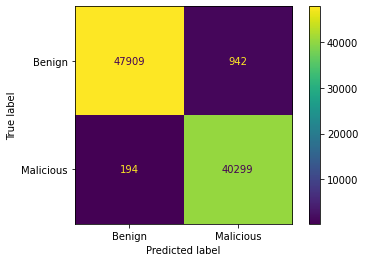

In [10]:
predictions, actuals = [], []

for i in tqdm(range(len(test_inputs))):

    if cuda:
        test_input_batch, test_target_batch, test_seq_length_batch = test_inputs[i].cuda(), test_targets[i], test_seq_lengths[i].cuda()

    predictions += (model.predict(test_input_batch, test_seq_length_batch)).detach().cpu()
    actuals += test_target_batch

compute_performance(torch.tensor(np.array(predictions)), torch.tensor(np.array(actuals)), 0.5)
print(confusion_matrix(actuals, np.round(predictions)))
disp = ConfusionMatrixDisplay(confusion_matrix(actuals, np.round(predictions), labels=[0, 1]),
                              display_labels=['Benign', 'Malicious'])
disp.plot(values_format="d")
plt.show()
disp.figure_.savefig('../checkpoints/URL_LSTM/CM_T.png')
plt.close(disp.figure_)